In [5]:
import cv2  
import numpy as np  
from PIL import Image
import pyzbar.pyzbar as pyzbar

class Analyse:   
    def step(image): #, temp1, temp2
        font = cv2.FONT_HERSHEY_PLAIN
        decodedObjects = pyzbar.decode(image)
        temp = []
        # Отделяем данные 
        for w in decodedObjects:
            temp.append(w[3])

        return decodedObjects


ModuleNotFoundError: No module named 'cv2'

In [ ]:
import cv2
import camera
import numpy as np


temp = []
while len(temp) < 2:

    img = camera.get_img("10.2.31.25","admin","Skills39!", True)
    tmp = bytes()
    for t in img:
        tmp += t

    nparr = np.fromstring(tmp, np.uint8)
    img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)


    temp = Analyse.step(img_np)

from IPython.display import Image, display
display(Image(tmp))

ModuleNotFoundError: No module named 'cv2'

In [ ]:
QRs = {}
for w in temp:
    if   w.data == b"1":
        print("1")
        x = max(list(map(lambda a: a.x, w.polygon)))
        y = min(list(map(lambda a: a.y, w.polygon)))
        QRs['1'] = [x,y]
    elif w.data == b"2":
        print("2")
        x = max(list(map(lambda a: a.x, w.polygon)))
        y = max(list(map(lambda a: a.y, w.polygon)))
        QRs['2'] = [x,y]
        
    elif w.data == b"3":
        print("3")
        x = min(list(map(lambda a: a.x, w.polygon)))
        y = max(list(map(lambda a: a.y, w.polygon)))
        QRs['3'] = [x,y]
        
        
    elif w.data == b"4":
        print("4")
        x = min(list(map(lambda a: a.x, w.polygon)))
        y = min(list(map(lambda a: a.y, w.polygon)))
        QRs['4'] = [x,y]
        
        
    else:
        x = 0
        y = 0
        print(w.data)
        
    
print(QRs)    

4
2
{'4': [1230, 937], '2': [649, 353]}


In [ ]:
# search 'One' coordinate
cords_ancle = []
cv2.imwrite('temp.png', img_np)
if len(QRs.keys()) >= 2:
    # One side or diagonal?
    if ('1' in QRs.keys() and '3' in QRs.keys()) or ("2" in QRs.keys() and "4" in QRs.keys()): #diagonal
        if ('1' in QRs.keys() and '3' in QRs.keys()):
            cords_ancle.append(QRs['1'])
            cords_ancle.append([QRs['1'][0],QRs['3'][1]])
            cords_ancle.append(QRs['3'])
            cords_ancle.append([QRs['1'][1],QRs['3'][0]])
        elif ("2" in QRs.keys() and "4" in QRs.keys()):
            cords_ancle.append([QRs['2'][0],QRs['4'][1]])
            cords_ancle.append(QRs['2'])
            cords_ancle.append([QRs['2'][1],QRs['4'][0]])
            cords_ancle.append(QRs['4'])
    else: #one side
        if('1' in QRs.keys() and '2' in QRs.keys()):
            a1 = QRs['1'][1] - QRs['2'][1]
            cords_ancle.append(QRs['1'])
            cords_ancle.append(QRs['2'])
            cords_ancle.append([QRs['2'][0]+a1, QRs['2'][1]])
            cords_ancle.append([QRs['1'][0]+a1, QRs['1'][1]])


        elif('1' in QRs.keys() and '4' in QRs.keys()):
            b2 = QRs['4'][0] - QRs['1'][0]
            cords_ancle.append(QRs['1'])
            cords_ancle.append([QRs['1'][0],QRs['1'][1]-b2])
            cords_ancle.append([QRs['4'][0],QRs['4'][1]-b2])
            cords_ancle.append(QRs['4'])


        elif('3' in QRs.keys() and '2' in QRs.keys()):
            b1 = QRs['3'][0] - QRs['2'][0]
            cords_ancle.append([QRs['2'][0],QRs['2'][1]+b1])
            cords_ancle.append(QRs['2'])
            cords_ancle.append(QRs['3'])
            cords_ancle.append([QRs['3'][0],QRs['3'][1]+b1])


        elif('3' in QRs.keys() and '4' in QRs.keys()):
            a2 = QRs['4'][1] - QRs['3'][1]
            cords_ancle.append([QRs['4'][0]-a2,QRs['4'][1]])
            cords_ancle.append([QRs['3'][0]-a2,QRs['3'][1]])
            cords_ancle.append(QRs['3'])
            cords_ancle.append(QRs['4'])


print(cords_ancle)


[[649, 937], [649, 353], [353, 1230], [1230, 937]]


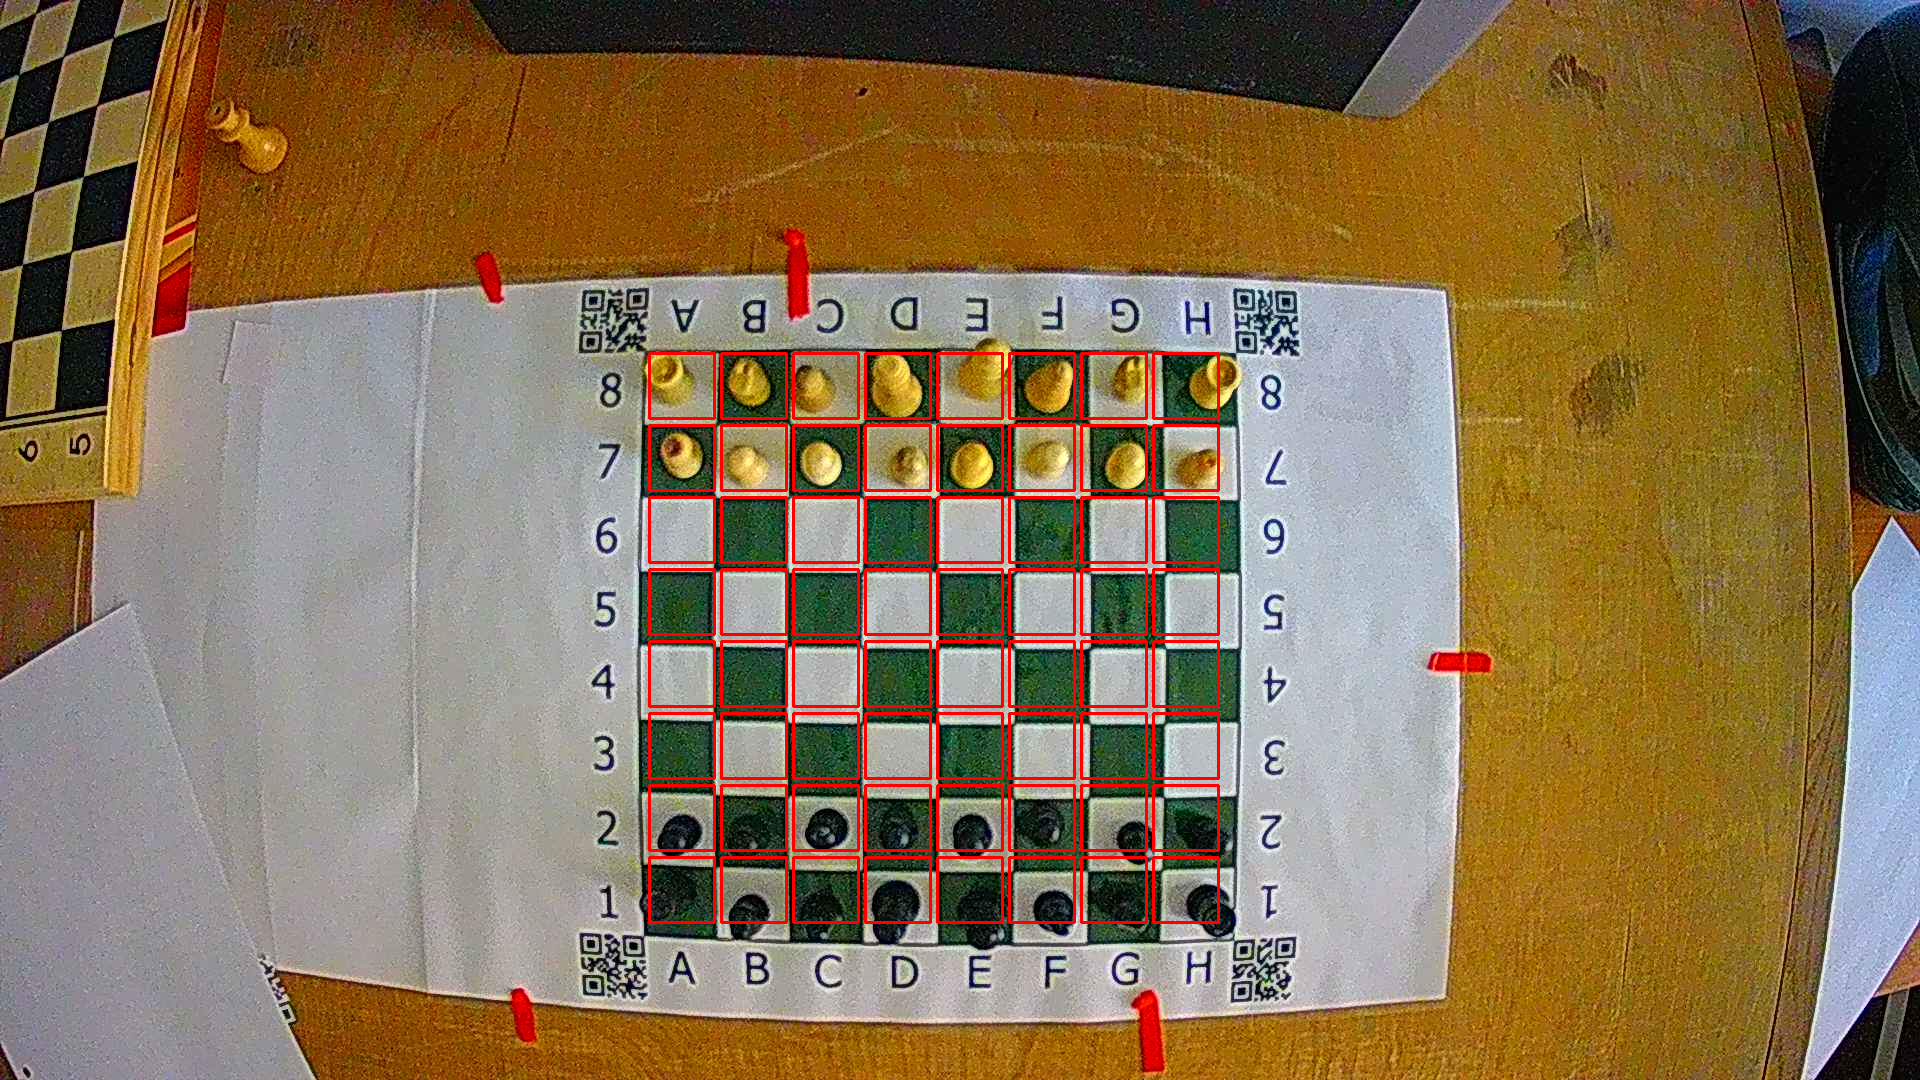

In [ ]:
kletki = dict()
cords = list()

v = cords_ancle[0][1] - cords_ancle[1][1]
g = cords_ancle[2][0] - cords_ancle[0][0]

step_v = int(v / 8)
step_g = int(g / 8)


letter = ['A','B','C','D','E','F','G','H']
chet = 0

for i in range(cords_ancle[1][1],cords_ancle[0][1]-step_v, step_v):
    for j in range(cords_ancle[1][0],cords_ancle[2][0]-step_g,step_g):
        cord = j, i
        cords.append(cord)
                
for i in range(1,9):
    for j in letter:
        mark = j + str(i)
        kletki[mark] = cords[chet]
        chet += 1

for pt in cords:
    x,y = pt
    cv2.rectangle(img_np, (x,y), (x+65,y+65), (0,0,255), 2)
    
cv2.imwrite('res.png', img_np)
display(Image('res.png'))


In [ ]:
import cv2
import camera
import numpy as np
import time
import requests
import time

arr_time = []
arr_len = []
start_time0 = time.time()

for i in range(1,50):
    start_time = time.time()

    temp = []
    while len(temp) < 1:
        start_time1 = time.time()
        
        img = camera.get_img("10.2.31.25","admin","Skills39!", True)
        tmp = bytes()
        for t in img:
            tmp += t

        nparr = np.fromstring(tmp, np.uint8)
        img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        start_time2 = time.time()

        
        temp = Analyse.step(img_np)
        start_time3 = time.time()
        
        print(f"get img = {start_time2-start_time1} | analyze = {start_time3-start_time2}")
    arr_len.append(len(temp))
    end_time = time.time()
    arr_time.append(end_time - start_time)
        
    # print(".", end="")
print()
# print(temp)
import statistics
print(statistics.mean(arr_time))
print(statistics.mean(arr_len))
print(arr_time)
print(arr_len)

start_time00 = time.time()

print(f"all time = {start_time00 - start_time0}")
    
from IPython.display import Image, display
# display(Image(tmp))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


get img = 0.9622664451599121 | analyze = 0.23224616050720215
get img = 0.757371187210083 | analyze = 0.23160958290100098
get img = 0.7551848888397217 | analyze = 0.233597993850708
get img = 0.757688045501709 | analyze = 0.23187804222106934
get img = 0.7584948539733887 | analyze = 0.23264050483703613
get img = 0.7569890022277832 | analyze = 0.23061466217041016
get img = 0.7555294036865234 | analyze = 0.23208856582641602
get img = 0.7574608325958252 | analyze = 0.22927021980285645
get img = 0.7576947212219238 | analyze = 0.23403310775756836
get img = 0.8576149940490723 | analyze = 0.23148226737976074
get img = 0.7580311298370361 | analyze = 0.2339155673980713
get img = 0.760498046875 | analyze = 0.23284220695495605
get img = 0.7612190246582031 | analyze = 0.23190736770629883
get img = 0.7559812068939209 | analyze = 0.23091697692871094
get img = 0.7584865093231201 | analyze = 0.23087334632873535
get img = 0.7573049068450928 | analyze = 0.23302030563354492
get img = 0.7561941146850586 | an